## Data preparation, basic statistics and visualization

Data mining, assignment, 21.03.2022  
**Edin Tufek**

An inevitable part of every project in the field of data mining is searching for,
editing and preparing data. In this task, you will get acquainted with a dataset and use procedures for converting data into the appropriate format and do
overview and display of basic statistics.

### Data

In the task you will review and prepare Hollywood movie ratings from
the [MovieLens](https://grouplens.org/datasets/movielens/) collection from the period **1995-2016**.

The same data is used in all assignments, so you should get to know the data well. This is a database for
evaluating recommendations systems that include viewers and their ratings on a scale of 1 to 5.
In addition to the basic user and rating matrix, it includes also movie information (e.g., genre, date, tags, players).

The dataset is in folder `./podatki/ml-latest-small`. The database contains the following files:

* ratings.csv: user data and ratings,
* movies.csv: movie genre information,
* cast.csv: player information,
* tags.csv: tag information (\emph{tags}),
* links.csv: links to related databases.

Before starting to solve the task, take a good look at the data and read the **README.txt** file. You can learn about the details on the [website](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Prepare methods for loading data into the appropriate data structures. They will come in handy
also for further tasks.
Pay attention to the size of the data.

Write down the code to read the files and prepare the appropriate matrices (and other structures) of the data that you will use to answer the questions below.

You can split the code into multiple cells.

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import csv
import matplotlib
import matplotlib.pyplot as plt
from collections import OrderedDict
from Orange.data.filter import SameValue
from Orange.data import Table
from datetime import datetime
import pandas as pd

### Questions

The main purpose of data mining is *knowledge discovery from data*,
i.e., answering questions using computational approaches.

By using the principles you have learned on the exercises and lectures, answer
the questions below. For each question, think carefully about the way you will
best give, show or justify the answer. The essential part is the answers to
questions rather than the implemention of your solution.

#### Question 1 (15%):
Which movies are the best on average? Prepare a list of
movies and their average ratings and print 10 movies from the top of the list.
Do you see any problems with such an assessment? How could you solve it? What are they?
results of that?

You can split the code into multiple cells.

In [2]:
ratings_raw = pd.read_csv('podatki/ml-latest-small/ratings.csv')
movies_raw = pd.read_csv('podatki/ml-latest-small/movies.csv')
movies_raw = movies_raw.drop(["genres"], axis=1)
ratings_by_movie = ratings_raw.groupby("movieId")["rating"].mean()


test= []
for i in list(ratings_by_movie[ratings_by_movie >= 3.5].index):
    if (ratings_raw["movieId"] == i).sum() >= 50:
        test.append([i,movies_raw[movies_raw["movieId"] == i]["title"].to_string(index=False),round(ratings_by_movie[i],2)])
#test_list.sort(key = lambda test_list: test_list[1])
test.sort(key = lambda test_list: test_list[2])
test.reverse()
for top_film in test[:11]:
    print("Movie: " + top_film[1] + ", Rating: " + str(top_film[2]))

Movie: Godfather, The (1972), Rating: 4.49
Movie: Shawshank Redemption, The (1994), Rating: 4.49
Movie: African Queen, The (1951), Rating: 4.42
Movie: Godfather: Part II, The (1974), Rating: 4.39
Movie: Maltese Falcon, The (1941), Rating: 4.39
Movie: Usual Suspects, The (1995), Rating: 4.37
Movie: Raging Bull (1980), Rating: 4.35
Movie: Chinatown (1974), Rating: 4.34
Movie: Rear Window (1954), Rating: 4.32
Movie: City of God (Cidade de Deus) (2002), Rating: 4.3
Movie: 12 Angry Men (1957), Rating: 4.3


I used pandas  because it was easier for me to manuipulate numbers and strings together. First I grouped every film with average rating of the movie. Then I put movies in the list if the rating is above 3.5 and  above 50 ratings per movie. Then sorted according to rating then reversed the list and printed the first 10 movies from the lsit.  

#### Question 2 (15%):
Each film belongs to one or more genres.
How many genres are there? Show the distribution of genres using appropriate
visualization.

You can split the code into multiple cells.

<class 'list'>


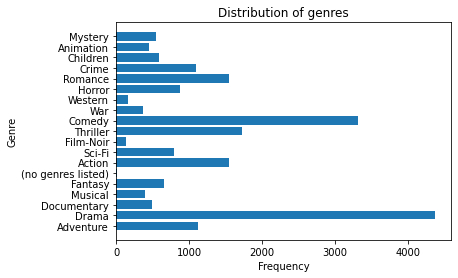

In [3]:
movies_csv = open('podatki/ml-latest-small/movies.csv')
lista = []

csv_readeri = csv.reader(movies_csv)
next(csv_readeri)

for row in csv_readeri:
    
    for i in row[2].split("|"):
       
        lista.append(i)

sets = set(lista) 
sets.remove('IMAX')
od = OrderedDict()
for genres in sets:
    od[genres] = lista.count(genres)
    
x = list(od.keys())
y = list(od.values())
print(type(x))
type(y)
plt.barh(x,y)
plt.title('Distribution of genres')
plt.ylabel('Genre')
plt.xlabel('Frequency')
plt.show()

Answer: **write down the answer and explain it**

There are 19 movie genres. Also there are movies that are not even listed in any genre

#### Question 3 (20%):
The number of ratings is different for each film. But is there a relationship between the number of ratings and the average movie rating? Describe the procedure that you used to answer the question.

You can split the code into multiple cells.

<ipython-input-4-b69dc71ecee3>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(avg_ratings,avg_num,"k.",color='blue')


Text(0.5, 1.0, 'Rating-Number of ratings relationship')

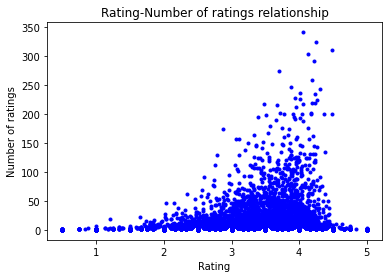

In [4]:
avg_ratings = []
avg_num = []
for movie in set(ratings_raw["movieId"]):
    ratings = ratings_raw[ratings_raw["movieId"] == movie]["rating"].count()
    avg_num.append(ratings)
    avg_ratings.append(ratings_raw[ratings_raw["movieId"] == movie]["rating"].mean())



plt.figure()
plt.plot(avg_ratings,avg_num,"k.",color='blue')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.title('Rating-Number of ratings relationship')



%%markdown
I did a scatter plot with rating as x axis and number of ratings as y axis. According to me the majority rated  from rating 3.5 to 4.5.

In [5]:
def pearson(x, y):
    return np.mean(((x - np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)))

pearson(avg_ratings,avg_num)
        

0.13082726621823268

I took the pearson function from exercises and implement it. The result is approximately 0.13. It seems the relation has pinch of positive correlation.

#### Question 4 (30%):
Each rating was entered on a specific date (column
*timestamp*). Does the popularity of individual films change over time?
Solve the problem by allocating ratings for a given film by time and at any time
point calculate the average for the last 30, 50, or 100 ratings. Draw a graph, how 
the rating changes and show it for two interesting examples of movies.

You can split the code into multiple cells.

In [6]:
times = []
reader = csv.DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]
    ts = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M')
    time = datetime.strptime(ts, '%Y-%m-%d %H:%M')
    times.append(time)
ratings_raw["date"] = times


In [7]:
# Movie: Godfather, The (1972), Rating: 4.49 id= 858
# Movie: Godfather: Part II, The (1974), Rating: 4.39 id=1221
first_film = {}
second_film = {}

for index in ratings_raw.index:
        
        if ratings_raw['movieId'][index] == 858:
            if ratings_raw['movieId'][index] in first_film:
                first_film[ratings_raw['movieId'][index]].append((ratings_raw['rating'][index],ratings_raw['date'][index]))
            else:
                first_film[ratings_raw['movieId'][index]] = [(ratings_raw['rating'][index],ratings_raw['date'][index])]
        if ratings_raw['movieId'][index] == 1221:
            if ratings_raw['movieId'][index] in second_film:
                second_film[ratings_raw['movieId'][index]].append((ratings_raw['rating'][index],ratings_raw['date'][index]))
            else:
                second_film[ratings_raw['movieId'][index]] = [(ratings_raw['rating'][index],ratings_raw['date'][index])]
                

        #print(rating['Name'][ind], df['Stream'][ind])

In [8]:
# first_film = dict(sorted(first_film.items(), key=lambda item: item[1]))
test3 = []
test4 = []
for key, values in first_film.items():
    for value in values:
        test3.append([key, value])   
for key, values in second_film.items():
    for value in values:
        test4.append([key, value])          
test3.sort(key = lambda test_list: test_list[1][1])
test4.sort(key = lambda test_list: test_list[1][1])


[[858, (4.0, Timestamp('1997-01-21 13:45:00'))],
 [858, (5.0, Timestamp('1997-02-06 02:11:00'))],
 [858, (5.0, Timestamp('1997-04-07 08:42:00'))],
 [858, (5.0, Timestamp('1997-04-09 06:23:00'))],
 [858, (4.0, Timestamp('1997-04-09 10:05:00'))],
 [858, (5.0, Timestamp('1997-04-13 19:11:00'))],
 [858, (4.0, Timestamp('1997-04-17 20:37:00'))],
 [858, (4.0, Timestamp('1997-05-19 16:17:00'))],
 [858, (4.0, Timestamp('1997-06-04 05:38:00'))],
 [858, (5.0, Timestamp('1997-06-23 15:35:00'))],
 [858, (4.0, Timestamp('1997-07-17 03:09:00'))],
 [858, (5.0, Timestamp('1997-12-03 17:27:00'))],
 [858, (5.0, Timestamp('1998-02-02 00:11:00'))],
 [858, (5.0, Timestamp('1998-08-15 03:18:00'))],
 [858, (5.0, Timestamp('1998-10-07 15:11:00'))],
 [858, (5.0, Timestamp('1998-12-07 18:43:00'))],
 [858, (5.0, Timestamp('1999-10-03 12:59:00'))],
 [858, (5.0, Timestamp('1999-10-04 04:26:00'))],
 [858, (4.0, Timestamp('1999-10-04 21:03:00'))],
 [858, (5.0, Timestamp('1999-10-06 20:35:00'))],
 [858, (5.0, Timesta

In [9]:
def add_rating(lis,n,d):
    avg = 0
    count = 0
    l = len(lis)
    while l - n >= 0:
        for i in range(count,n+count):
            avg += lis[i][1][0]
        d[count] = avg / n
        count+=1
        avg = 0
        l-=1
       

Text(0.5, 1.0, 'Godfather last 45 ratings')

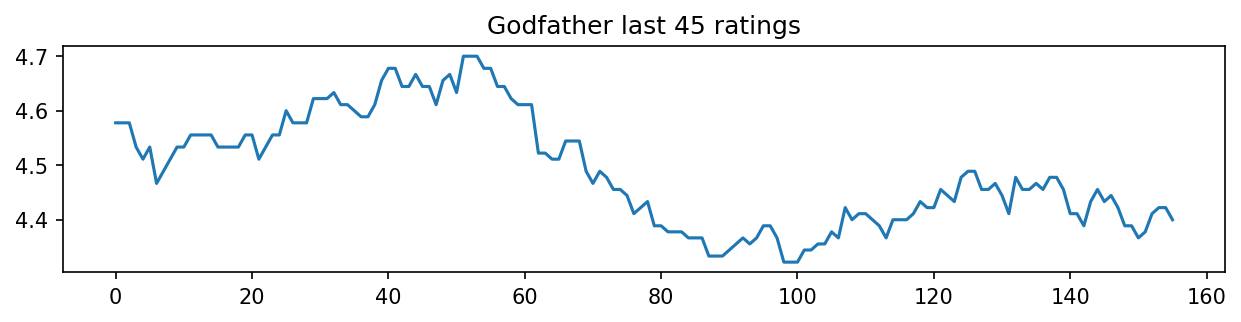

In [19]:
baba = {}        
add_rating(test3,30,baba)
plt.figure(figsize=(10, 2), dpi=150)
x = list(baba.keys())
y = list(baba.values())
plt.plot(x,y)
plt.title("Godfather last 30 ratings")

In [ ]:
baba = {}        
add_rating(test3,15,baba)
plt.figure(figsize=(10, 2), dpi=150)
x = list(baba.keys())
y = list(baba.values())
plt.plot(x,y)
plt.title("Godfather last 15 ratings")

In [ ]:
baba = {}        
add_rating(test3,45,baba)
plt.figure(figsize=(10, 2), dpi=150)
x = list(baba.keys())
y = list(baba.values())
plt.plot(x,y)
plt.title("Godfather last 1 rating")

In [ ]:
baba = {}        
add_rating(test4,45,baba)
plt.figure(figsize=(10, 2), dpi=150)
x = list(baba.keys())
y = list(baba.values())
plt.plot(x,y)
plt.title("Godfather 2 last 30 ratings")

In [ ]:
baba = {}        
add_rating(test4,45,baba)
plt.figure(figsize=(10, 2), dpi=150)
x = list(baba.keys())
y = list(baba.values())
plt.plot(x,y)
plt.title("Godfather last 15 ratings")

In [ ]:
baba = {}        
add_rating(test4,45,baba)
plt.figure(figsize=(10, 2), dpi=150)
x = list(baba.keys())
y = list(baba.values())
plt.plot(x,y)
plt.title("Godfather last 1 rating")

First I converted timestamp into DataTime object.Then I made two separate dictionaries for the movies I chose to plot.Then converted to list in order to sort them. After that I created a function which rates every last "n" movies. At the en

#### Question 5 (20%):
How would you rate the popularity of individual actors? Describe the procedure
 for evaluating and print the 10 most popular actors.

You can split the code into multiple cells.

In [11]:
actors = dict()
reader = csv.DictReader(open('podatki/ml-latest-small/cast.csv', 'rt', encoding='utf-8'))
for row in reader:
    for actor in row["cast"].split("|"):
        if actor not in actors:
            actors[actor] = []
        actors[actor].append(int(row["movieId"]))


In [12]:
test2 = dict()
for i in test:
    test2[i[0]] = i[2] 
actors_popularity = dict.fromkeys(actors.keys(), 0)
for actor in actors:
    num = 0
    for ID in actors[actor]:
        if ID in test2: num += test2[ID]
    actors_popularity[actor] += num



In [13]:
actors_popularity = sorted(actors_popularity.items(), key=lambda x: -x[1])
for actorName, actorScore in actors_popularity[:11]:
    if actorName: print("Actor: " + actorName + ", Score: " + str(round(actorScore, 2)))

Actor: Harrison Ford, Score: 44.45
Actor: Robert De Niro, Score: 36.62
Actor: Tom Hanks, Score: 35.0
Actor: Matt Damon, Score: 30.99
Actor: Morgan Freeman, Score: 28.05
Actor: John Ratzenberger, Score: 26.82
Actor: Sigourney Weaver, Score: 26.08
Actor: Robert Duvall, Score: 24.84
Actor: Brad Pitt, Score: 24.16
Actor: Steve Buscemi, Score: 23.65


I would like to rate actors by summating the ratings of their movies. I made a dictionary which I put actor as key, as value I put wheir movies which he played. Then I made another dictionary which I put name of the actory as key and actor's rating. 

#### Bonus question (5%):

What's your favorite movie? Why?

My favorite movie is Recep Ivedik 4 because the Recep Ivedik franchise is the ones who I will watch again and again but , according to the plot I chose that. The most important part of that movie is how the protagonist Recep Ivedik is how he enters the competition like Survivor in order to save the football field of the children.

### Notes
You can use the built-in `csv` module to load data.

In [14]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Data in the last line of the file:

In [15]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Convert the time format (*Unix time*). Code about the structure is listed in documentation of the module  [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [16]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'